Steps:
1. Installing the Tesseract OCR software on Linux machine (Google Colab) using sudo apt install
2. Installing the Python wrapper for Tesseract
3. Using wget command on linux machine to retrieve the content from web

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract --quiet

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,634 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
!wget https://cdn-0.therandomvibez.com/wp-content/uploads/2019/09/My-Hustle-Quotes-400x535.jpg -O demo.jpg

--2021-04-21 16:12:36--  https://cdn-0.therandomvibez.com/wp-content/uploads/2019/09/My-Hustle-Quotes-400x535.jpg
Resolving cdn-0.therandomvibez.com (cdn-0.therandomvibez.com)... 104.21.192.43, 104.21.192.42, 2606:4700:3039::6815:c02a, ...
Connecting to cdn-0.therandomvibez.com (cdn-0.therandomvibez.com)|104.21.192.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘demo.jpg’

demo.jpg                [ <=>                ]  20.63K  --.-KB/s    in 0.01s   

2021-04-21 16:12:36 (1.43 MB/s) - ‘demo.jpg’ saved [21121]



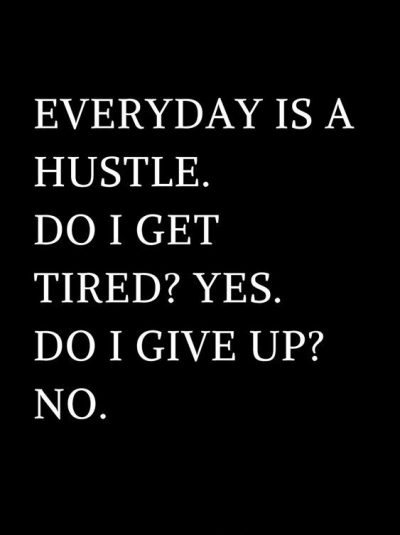

In [ ]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

img = cv2.imread('demo.jpg') # Reading an Image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting the BGR Image to RGB Image

cv2_imshow(img)

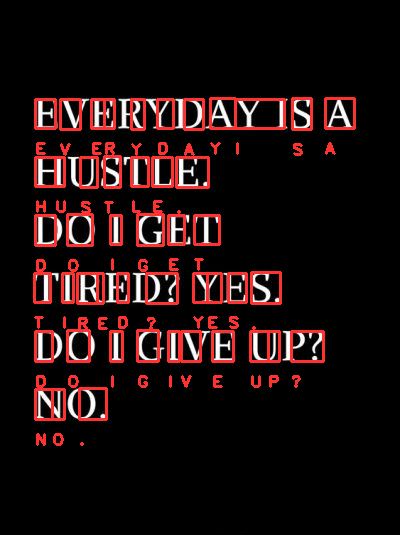

In [ ]:
# Program 1: Getting bounding boxes for characters
hImg, wImg,_ = img.shape # Taking the height and width of an Image
boxes = pytesseract.image_to_boxes(img) # Getting the boxes for every letter
for b in boxes.splitlines():
    b = b.split(' ') 
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(img, (x,hImg- y), (w,hImg- h), (50, 50, 255), 2)
    cv2.putText(img,b[0],(x,hImg- y+25),cv2.FONT_HERSHEY_SIMPLEX,0.5,(50,50,255),2)

cv2_imshow(img)


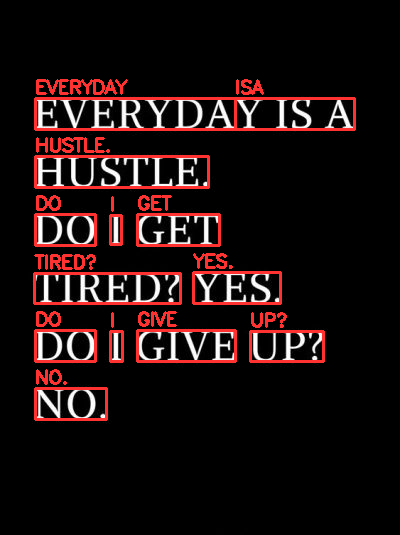

In [ ]:
# Program 2: Getting Bounding boxes for the complete word
img = cv2.imread('demo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
boxes = pytesseract.image_to_data(img)  # Getting the data of every letter from Image
for a,b in enumerate(boxes.splitlines()): # Iterating through Bounding Boxes
        if a!=0:
            b = b.split()
            if len(b)==12: # For getting the text in wordings use len(b)== 12
                x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9]) # Co-ordinates of respective boxes
                cv2.putText(img,b[11],(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.6,(50,50,255),2)
                cv2.rectangle(img, (x,y), (x+w, y+h), (50, 50, 255), 2)

cv2_imshow(img)